# 1. Business Understanding

## 1.1 Problem Statements

Berdasarakan kondisi yang telah diuraikan, perusahaan akan mengembangkan sebuah sistem prediksi harga diamonds untuk menjawab permasalahan berikut.  
1. Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap harga diamonds?
2. Berapa harga pasar diamonds dengan karakterisitik atau fitur tertentu?

## 1.2 Goals

Untuk menjawab pertanyaan tersebut, Anda akan membuat predictive modelling dengan goals sebagai berikut.  
1. Mengetahui fitur yang paling berkorelasi dengan harga diamonds.
2. Membuat model machine learning yang dapat memprediksi harga diamonds seakurat mungkin berdasarkan fitur-fitur yang ada.

## 1.3 Metodologi

Prediksi harga merupakan tujuannya. Harga merupakan variabel kontinu, oleh karena itu proyek kali ini masuk ke permasalahan regresi. Oleh karena itu, akan dibangun model regresi untuk memprediksi harga diamond.

## 1.4 Metrik

Untuk kasus regresi, beberapa metrik yang biasanya digunakan adalah Mean Squared Error (MSE) atau Root Mean Square Error (RMSE).

# 2. Data Understanding

## 2.1 Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Observasi**  
Output kode diatas memberikan informasi sebagai berikut:
- Ada 53940 baris data
- Terdapat 10 kolom fitur yaitu carat, cut, color, clarity, depth, table, price, x, y, z

## 2.2 Exploratory Data Analysis

### 2.2.1 Deskripsi Variabel

- price: harga dalam dolar Amerika Serikat ($) adalah fitur target.
- carat: mempresentasikan bobot dari diamonds (0.2 - 5.01), digunakan sebagai ukuran dari batu pertama dan perhiasan.
- cut: mempresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: mempresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: mempresentasikan seberapa jernih diamonds (I1 (paling buruk), SI1, SI2, VS1, VS2, VVS2, VVS1, IF(terbaik)).
- x: mempresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) --- (43 - 79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar (43 - 95)

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Dari output terlihat bahwa:
- Terdapat 3 kolom dengan tipe object, yaitu cut, color, dan clarity. Kolom ini merupakan categorical features (non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengurukuran secara fisik.
- Terdapat 1 kolom numeri dengan tipe data int64, yaitu price. Kolom ini merupakan target fitur kita.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 2.2.2 Missing Value

In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print(f"Nilai 0 pada variabel ada:\nx: {x}\ny: {y}\nz: {z}")

Nilai 0 pada variabel ada:
x: 8
y: 7
z: 20


In [6]:
diamonds.loc[(diamonds.z == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Observasi:
- Seluruh data bernilai 0 pada dimensi x dan y juga memiliki nilai 0 pada dimensi Z.  
- 20 sampel missing value merupakan jumlah yang kecil jika dibandingkan dengan jumlah total sampel yaitu 53.940. Jika 20 sampel ini dihapus, tidak akan menjadi masalah yang signifikan.

In [7]:
diamonds = diamonds.loc[(diamonds[['x', 'y', 'z']] != 0).all(axis=1)]
diamonds.shape

(53920, 10)

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 2.2.3 Menangani Outliers

**Carat**

<Axes: xlabel='carat'>

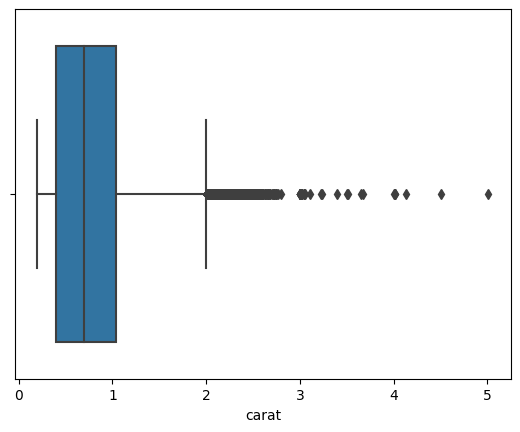

In [9]:
sns.boxplot(x=diamonds.carat)

**Fitur Table**

<Axes: xlabel='table'>

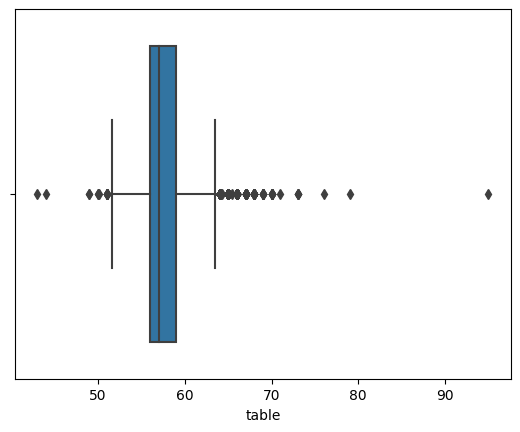

In [10]:
sns.boxplot(x=diamonds.table)

**Fitur x**

<Axes: xlabel='x'>

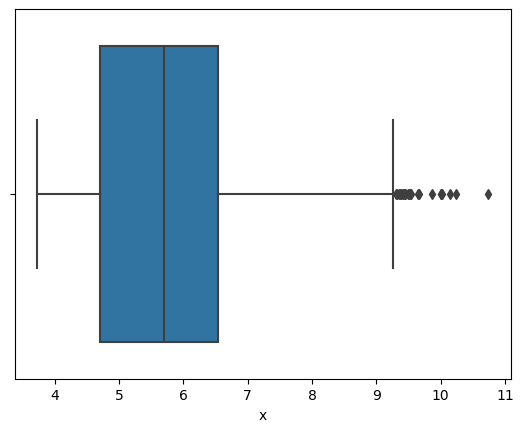

In [11]:
sns.boxplot(x=diamonds.x)

Observasi:  
- Pada beberapa fitur numerik diatas terdapat outliers. Hal tersebut bisa dilihat dari nilai apa pun yang berada di luar batas diangaap outlier

Batas bawah = Q1 - 1.5 * IQR  
Batas atas = Q3 + 1.5 * IQR

In [12]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3 - Q1

diamonds = diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]
diamonds.shape

<ipython-input-12-fe6f92ae88c1>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-12-fe6f92ae88c1>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-12-fe6f92ae88c1>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds = diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(47524, 10)

In [13]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='table'>

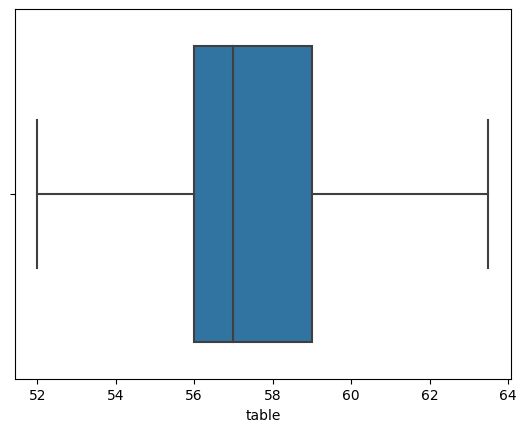

In [14]:
sns.boxplot(x=diamonds.table)

### 2.2.4 Univariate Analysis

In [15]:
numerical_features = ['price', 'carat', 'depth', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

#### **Categorical Features**

Fitur Cut

           jumlah  persentase
Ideal       20340       42.80
Premium     12115       25.49
Very Good   10994       23.13
Good         3745        7.88
Fair          330        0.69


<Axes: title={'center': 'cut'}>

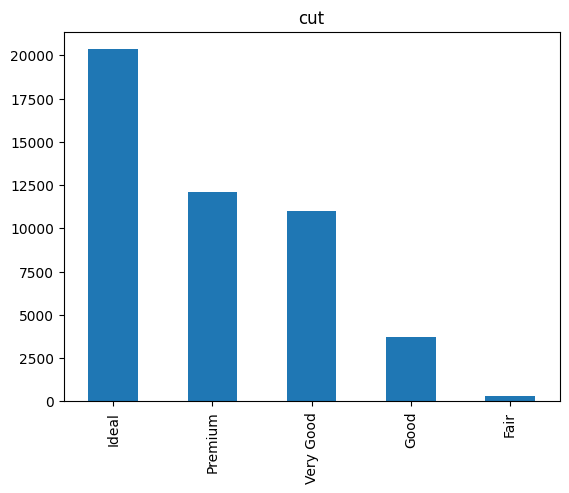

In [16]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percentage = 100*diamonds[feature].value_counts(normalize=True)
df_ = pd.DataFrame({'jumlah':count, 'persentase':percentage.round(2)})
print(df_)
count.plot(kind='bar', title=feature)

Terdapat 5 kategori pada fitur Cut, Dari data persentase dapat disimpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade ideal dan premium.

Fitur Color

   jumlah sampel  persentase
G          10081       21.21
E           8910       18.75
F           8466       17.81
H           7176       15.10
D           6195       13.04
I           4462        9.39
J           2234        4.70


<Axes: title={'center': 'color'}>

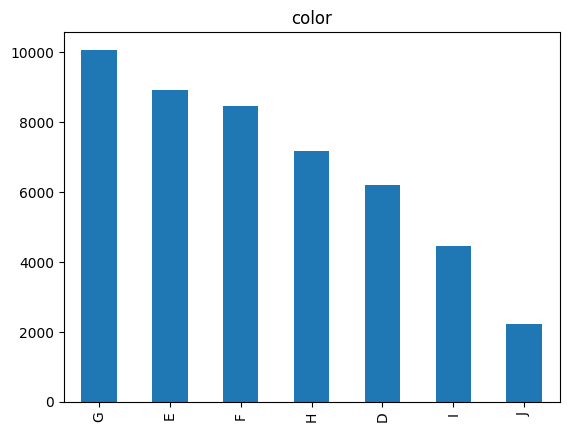

In [17]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = diamonds[feature].value_counts(normalize=True)*100
df_ = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(2)})
print(df_)
count.plot(kind='bar', title=feature)

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik diatas, dapat kita simpulkan bahwa sebagian besar grade berapa pada grade menengah, yaitu G, F, H

Fitur Clarity

      jumlah sampel  persentase
SI1           11552       24.31
VS2           10928       22.99
SI2            7402       15.58
VS1            7373       15.51
VVS2           4683        9.85
VVS1           3463        7.29
IF             1650        3.47
I1              473        1.00


<Axes: title={'center': 'clarity'}>

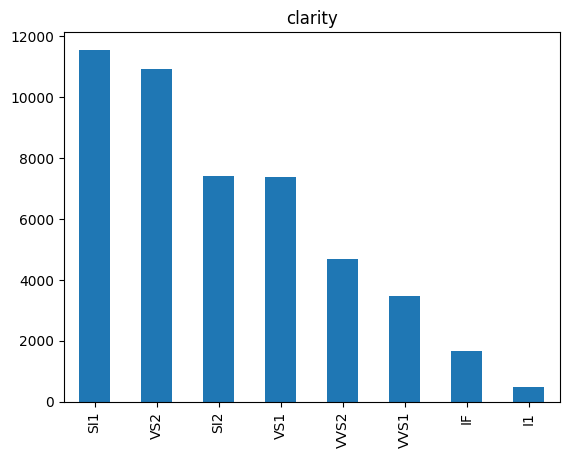

In [18]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df_ = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(2)})
print(df_)
count.plot(kind='bar', title=feature)

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari paling buruk ke yang paling baik, yaitu: I1, SI1, SI2, VS2, VS1, VVS2, VVS1, dan IF. Dari grafik diatas dapat disimpulkan bahwa sebagian besar merupakan grade rendah. yaitu SI1, S12, VS2.

#### Numerical Features

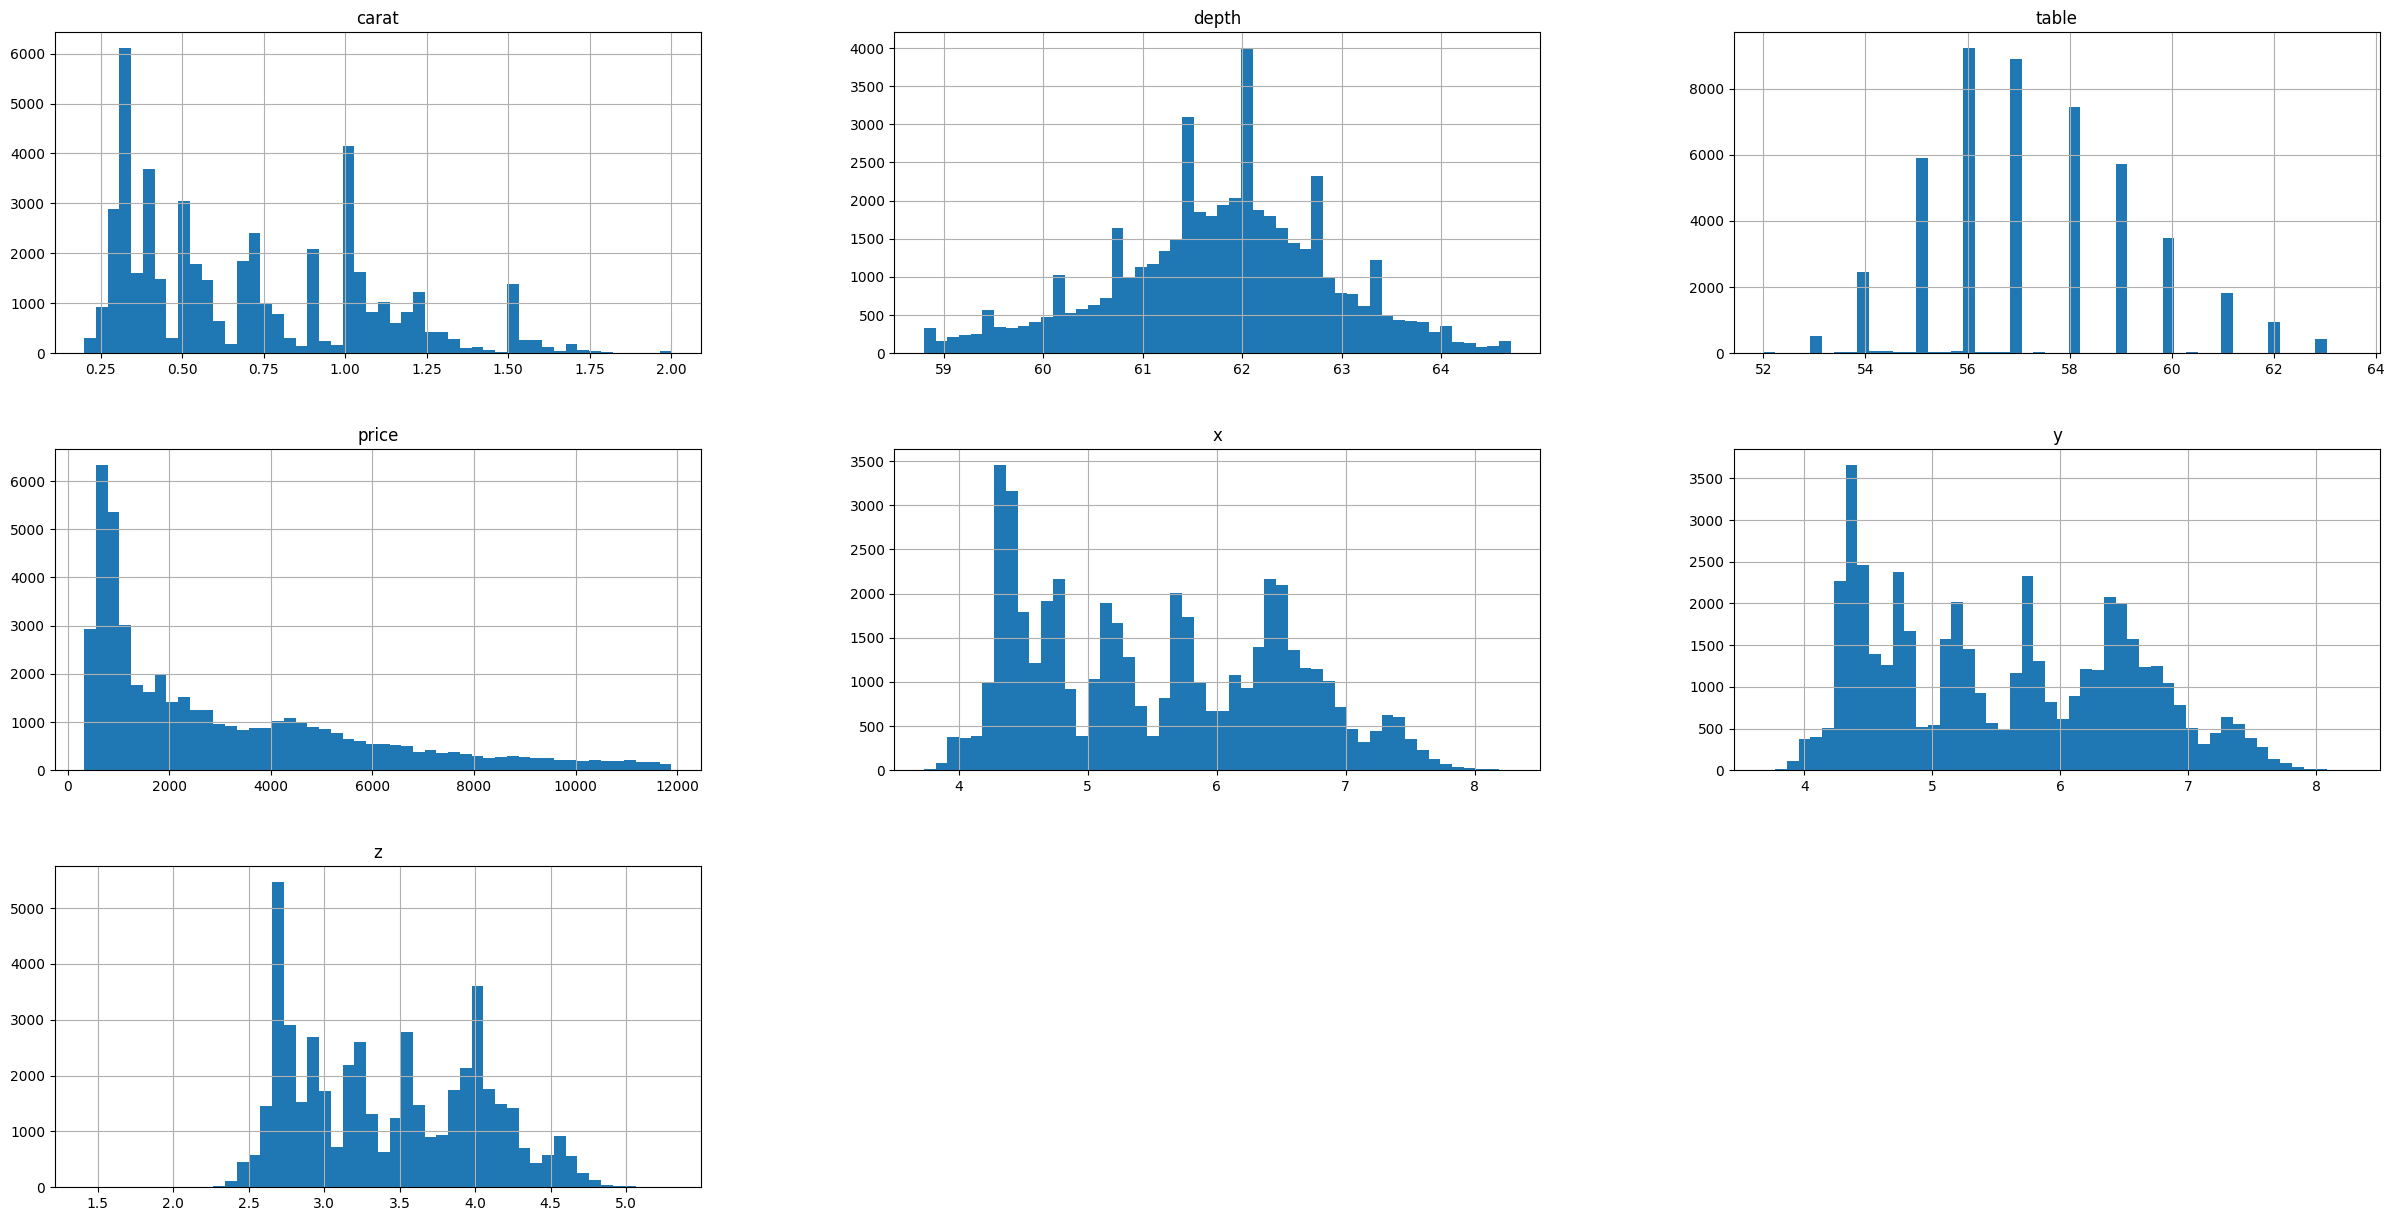

In [19]:
diamonds.hist(bins=50, figsize=(30, 15))
plt.show()

- Peningkatan harga diamond sebanding dengan penurunan jumlah sampel.
- Rentang harga diamonds cukup tinggi yaitu skala ratusan dolar amerika hingga sekitar USD11800
- Setengah harga berlian dibawah USD2500
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### 2.2.5 Multivariate Analysis

#### Categorical Features

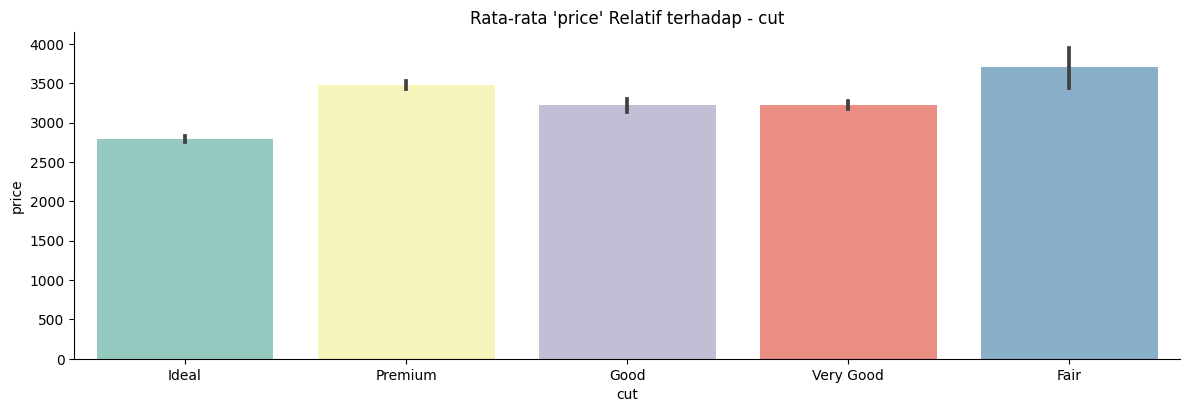

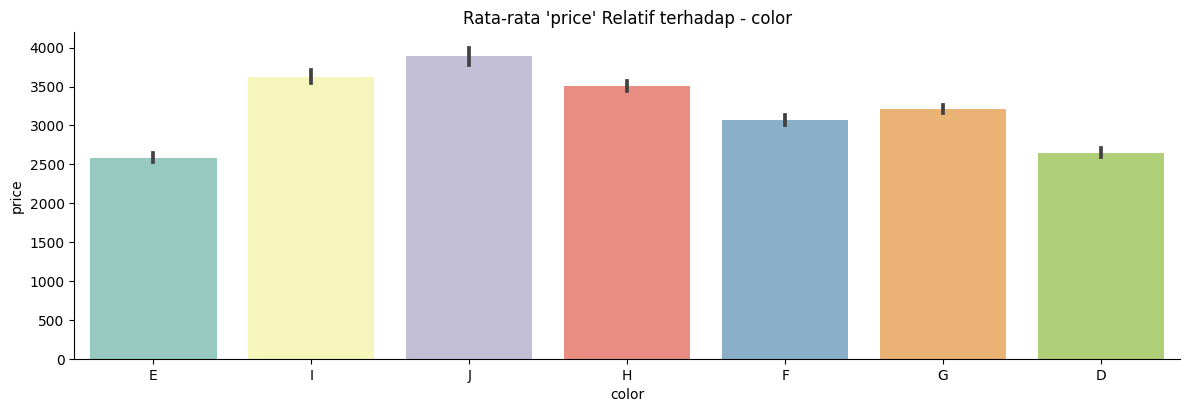

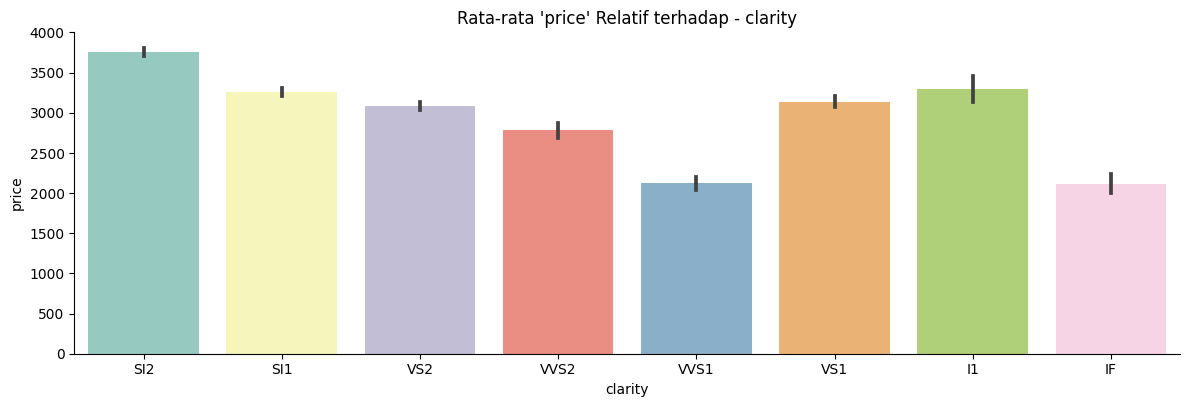

In [20]:
for col in categorical_features:
    sns.catplot(x=col, y='price', kind='bar', dodge=False, height=4, aspect=3, data=diamonds, palette='Set3')
    plt.title(f"Rata-rata 'price' Relatif terhadap - {col}")

Dengan mengamati rata-rata harga relatif terhadap fitur kategorik di atas, kita memperoleh insight sebagai berikut.  
- pada fitur cut, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur 'color', semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D.
- pada fitur 'clarity', secara umum, diamond dengan grade lebih rendah, memiliki harga yang lebih tinggi. Hal ini dapat disimplkan bahwa kejernihan / clarity memiliki pengaruh yang rendah terhadap harga.
- Fitur kategori, memiliki pengaruh yang rendah terhadap harga.

#### Numerical Features

<ipython-input-21-9a4e2cc565d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diamonds.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix Fitur Numerik')

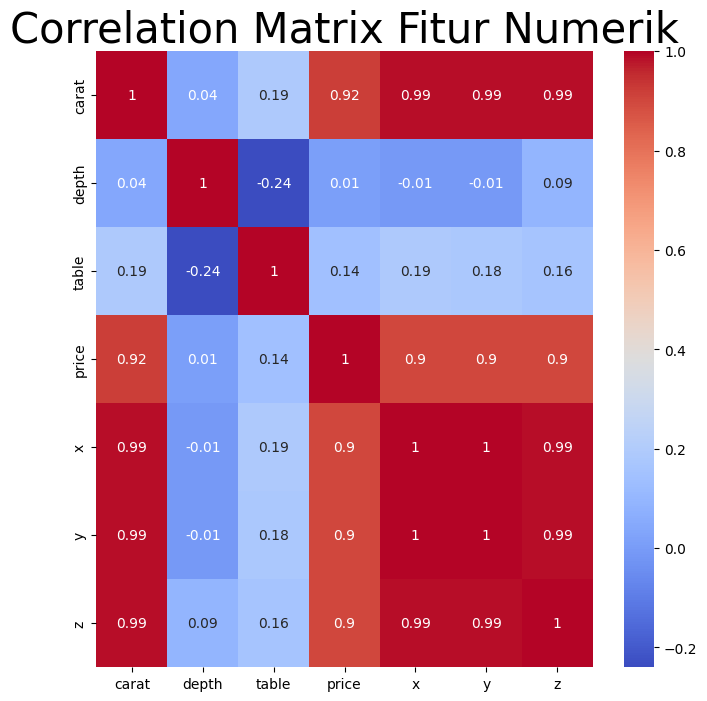

In [21]:
plt.figure(figsize=(8, 8))
corr = diamonds.corr().round(2)

sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Fitur Numerik", size=30)

Korelasi fitur carat, x, y, dan z memiliki skor korelasi yang besar (>= 0.9) dengan fitur target 'price'. Artinya fitur price berkorelasi tinggi dengan keempat fitur tsb. Sementara itu, fitur 'depth' memiliki korelasi yang sangat kecil (0.04). Sehingga, fitur tersebut dapat di drop.

In [22]:
diamonds.drop(['depth'], inplace=True, axis=1)

In [23]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price', 'x', 'y', 'z'], dtype='object')

## 2.3 Data Preparation

### 2.3.1 Encoding fitur kategori

In [24]:
from sklearn.preprocessing import OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds[['cut', 'color', 'clarity']])], axis=1)
diamonds.drop(columns=['cut', 'color', 'clarity'], inplace=True)
diamonds.head()


,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### 2.3.2 Reduksi Dimensi dengan PCA

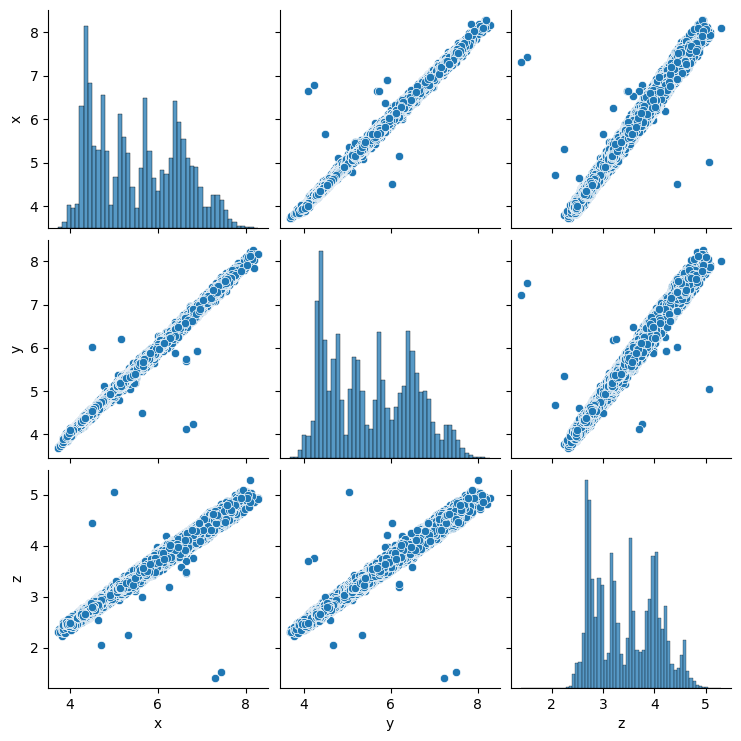

In [25]:
sns.pairplot(diamonds[['x', 'y', 'z']])

Ketiga fitur diatas memiliki korelasi yang tinggi dan memiliki informasi yang sama yaitu ukuran diamonds.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
pca.fit(diamonds[['x', 'y', 'z']])
princ_comp = pca.transform(diamonds[['x', 'y', 'z']])

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Arti output diatas adalah 99.8% informasi pada ketiga fitur x, y, z terdapat PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat ada PC kedua dan ketiga. Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur diberi nama 'dimension'.

In [28]:
pca = PCA(n_components=1, random_state=42)
pca.fit(diamonds[['x', 'y', 'z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], inplace=True, axis=1)

In [29]:
diamonds

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,2757,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.295534
53936,0.72,55.0,2757,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.294127
53937,0.70,60.0,2757,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0.209390
53938,0.86,58.0,2757,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.884149


### 2.3.3 Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### 2.3.4 Standarisasi

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
19657,1.238586,-2.110576,1.333884
31936,-1.103620,-0.128490,-1.260627
2485,0.054022,-2.110576,0.267424
35475,-0.861323,-0.128490,-0.851029
33606,-1.076698,-1.119533,-1.248431


In [33]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,38019.0000,38019.0000,38019.0000
mean,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3728,-2.6061,-1.8846
25%,-0.8882,-0.6240,-0.9269
50%,-0.2960,-0.1285,-0.1115
75%,0.8078,0.8626,0.8846
max,3.4731,3.0924,2.6963


In [34]:
diamonds.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


# Model Development

In [35]:
models_df = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['RandomForest', 'Boosting'])

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

RandomForest = RandomForestRegressor(n_estimators=100, max_depth=32, random_state=42, n_jobs=-1)
RandomForest.fit(X_train, y_train)

models_df.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RandomForest.predict(X_train), y_true=y_train)

## 3.3 Boosting Algorithm

In [37]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.01, random_state=42)
boosting.fit(X_train, y_train)
models_df.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

Menggunakan Mean Squared Error (MSE).

In [38]:
scaler = StandardScaler()
scaler.fit(X_test[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

mse = pd.DataFrame(columns=['train', 'test'], index=['RandomForest','Boosting'])
model_dictionary = {'RandomForest': RandomForest, 'Boosting': boosting}

for name, model in model_dictionary.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))*1e-3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))*1e-3

In [39]:
mse

,train,test
RandomForest,19.583785,148.468065
Boosting,916.671335,906.280777


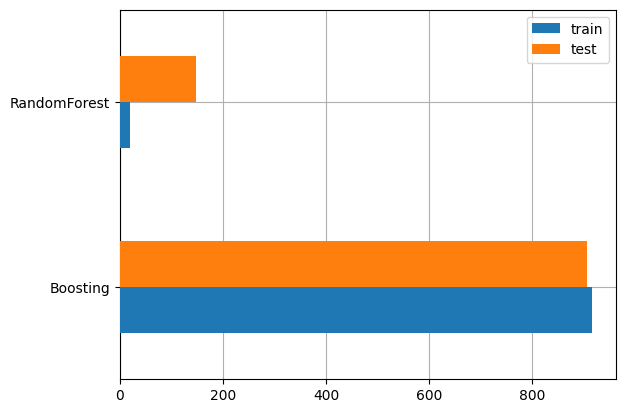

In [40]:
fig, axes = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=axes, zorder=3)
axes.grid()

Berdasarkan grafik diatas, model Random Forest memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar.